In [ ]:
#IE407 Internet of Things Project Work
#Names: Visaj Shah, Aayush Desai
#IDs: 201801016, 201801060

**Project: Analyzing Water Suitability for Aquaculture**

**Notebook 1: Selecting the Best Model**

*Note*: As is common with ML algorithms, every time you run this notebook, you can expect different results for various reasons like random splits, different optimal k, etc. These are properties of the algorithms and should not be interpreted as a fallacy in the results.

The results included in the report and used for building the final report are based on the final run of the algorithms before we started developing the actual models and writing the reports.

In [ ]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Reading the data

df = pd.read_excel('data.xlsx')

In [ ]:
#Number of observations in dataset

print(len(df))

9623


In [ ]:
#x is the collection of independent variables i.e. paramters.
#y is the classification status column where 1 indicates Safe (S) water and 0 indicates Not Safe (NS) water.

x = df[['ph', 'temp30', 'turb30', 'temp60', 'turb60']]
y = df['class']

In [ ]:
#We have five parameters (independent variables) to consider and predict the class.
#Before we start building a model, we have two tasks.
#(A). Create Training set and Testing set.
#We will follow a 70-30 split rule i.e. we will use 70% of our dataset to train the model and 30% to test.

In [ ]:
#Creating the Training set and Testing set.

xTrainSet, xTestSet, yTrainSet, yTestSet = train_test_split(x, y, test_size = 0.3)

In [ ]:
#(B). Visualizing the five parameters of the Training set to get an idea about the range and kind of data we are dealing with.

Text(0, 0.5, 'pH')

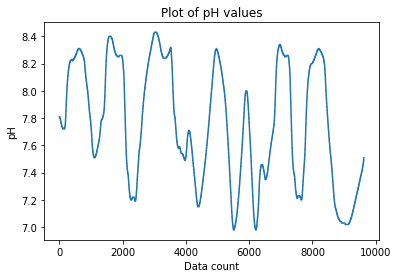

In [ ]:
#Plotting pH values in Training set

x['ph'].plot.line(title='Plot of pH values')
plt.xlabel('Data count')
plt.ylabel('pH')

Text(0, 0.5, 'Temp (in Celsius)')

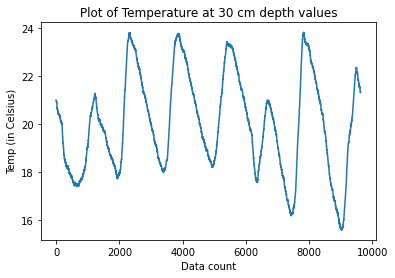

In [ ]:
#Plotting Temperature at 30 cm depth values in Training set

x['temp30'].plot.line(title='Plot of Temperature at 30 cm depth values')
plt.xlabel('Data count')
plt.ylabel('Temp (in Celsius)')

Text(0, 0.5, 'Turbidity (in NTU)')

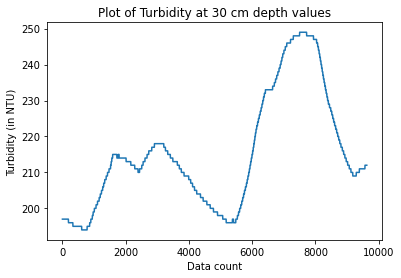

In [ ]:
#Plotting Turbidity at 30 cm depth values in Training set
#Turbidity is measured only in integers hence one can see sharp edges in the graph.

x['turb30'].plot.line(title='Plot of Turbidity at 30 cm depth values')
plt.xlabel('Data count')
plt.ylabel('Turbidity (in NTU)')

Text(0, 0.5, 'Temp (in Celsius)')

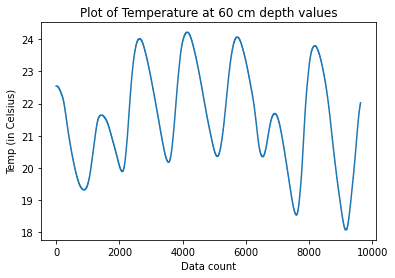

In [ ]:
#Plotting Temperature at 60 cm depth values in Training set

x['temp60'].plot.line(title='Plot of Temperature at 60 cm depth values')
plt.xlabel('Data count')
plt.ylabel('Temp (in Celsius)')

Text(0, 0.5, 'Turbidity (in NTU)')

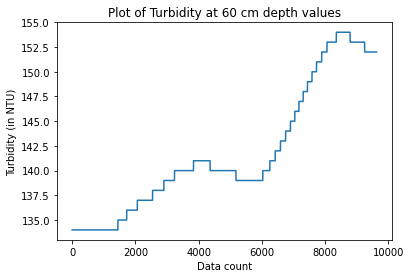

In [ ]:
#Plotting Turbidity at 60 cm depth values in Training set
#As we do down, changes in turbidity reduce significantly hence the steps become more evident.

x['turb60'].plot.line(title='Plot of Turbidity at 60 cm depth values')
plt.xlabel('Data count')
plt.ylabel('Turbidity (in NTU)')

In [ ]:
#Now that we have visualized the parameters, we can begin the Machine Learning part.

**Logistic Regression**

In [ ]:
#Training Model

logistic = LogisticRegression()
logistic.fit(xTrainSet, yTrainSet)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicting values and checking performance
#Accuracy is on a scale of 0 (0%) to 1(100%) i.e. an accuracy of 0.5 indicates 50% accuracy.

yPred = logistic.predict(xTestSet)

maeLR = mean_absolute_error(yTestSet, yPred)
accLR = accuracy_score(yTestSet, yPred)

print("Mean Absolute Error = ", maeLR)
print("Accuracy = ", accLR)

Mean Absolute Error =  0.17492206442674055
Accuracy =  0.8250779355732595


**Random Forest Classifier**

In [ ]:
#Training model with 100 trees

randomForest = RandomForestClassifier(n_estimators = 100)
randomForest.fit(xTrainSet, yTrainSet)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predicting values and checking performance
#Accuracy is on a scale of 0 (0%) to 1(100%) i.e. an accuracy of 0.5 indicates 50% accuracy.

yPred = randomForest.predict(xTestSet)

maeRF = mean_absolute_error(yTestSet, yPred)
accRF = accuracy_score(yTestSet, yPred)

print("Mean Absolute Error = ", maeRF)
print("Accuracy = ", accRF)

Mean Absolute Error =  0.00034638032559750607
Accuracy =  0.9996536196744025


**KNN - K Nearest Neighbors**

In [ ]:
#We will first have to determine the ideal k for our dataset.
#We will try for all k in [1, 25] and compare their accuracy.

kValues = range(1, 26)
accScores = {}

for i in kValues:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(xTrainSet, yTrainSet)
  yPred = knn.predict(xTestSet)
  accScores[i] = accuracy_score(yTestSet, yPred)

sortAccScores = sorted(accScores.items(), key=lambda x:x[1])
print("The highest accuracy is achieved for k = ", sortAccScores[-1][0])

The highest accuracy is achieved for k =  3


In [ ]:
#Training model for k = 3 (since we got that k in our final run)

knn = KNeighborsClassifier(n_neighbors = sortAccScores[-1][0])
knn.fit(xTrainSet, yTrainSet)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Predicting values and checking performance
#Accuracy is on a scale of 0 (0%) to 1(100%) i.e. an accuracy of 0.5 indicates 50% accuracy.

yPred = knn.predict(xTestSet)

maeKNN = mean_absolute_error(yTestSet, yPred)
accKNN = accuracy_score(yTestSet, yPred)

print("Mean Absolute Error = ", maeKNN)
print("Accuracy = ", accKNN)

Mean Absolute Error =  0.0
Accuracy =  1.0


As we can see from above, K Nearest Neighbors gives the best performance among all three. Since it gives an accuracy of 1 and a MAE of 0 (in our final run), it is not possible to have a better model at this stage, hence we stop here.